In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### **1. Data Overview**

In [2]:
df = pd.read_parquet("../features/training_set")

In [3]:
df.head()

race_year              race_name  driver_id driver_nationality     team  \
0       2011  Australian Grand Prix         13          Brazilian  Ferrari   
1       2011  Australian Grand Prix         13          Brazilian  Ferrari   
2       2011  Australian Grand Prix         13          Brazilian  Ferrari   
3       2011  Australian Grand Prix         13          Brazilian  Ferrari   
4       2011  Australian Grand Prix         13          Brazilian  Ferrari   

   lap_percent  position_gain  pit_stop_rate  rolling_avg_lap_time_3  \
0     0.017241              3     173.998991              104.195999   
1     0.034483              3      86.999748               99.340500   
2     0.051724              3      57.999888               98.115000   
3     0.068966              3      43.499937               94.683001   
4     0.086207              3      34.799960               94.758670   

   lap_time_cv_3  qualifying_avg_sec  qualifying_delta  points  \
0       0.000000           85.746996          0.431999     6.0   
1       0.069123           85.746996          0.431999     6.0   
2       0.054010           85.746996          0.431999     6.0   
3       0.009490           85.746996          0.431999     6.0   
4       0.009318           85.746996          0.431999     6.0   

   rolling_fatigue_score  position_change_rate_3  is_pole_position  
0                    0.0                       0             False  
1                    0.0                       0             False  
2                    0.0                       0             False  
3                    0.0                       0             False  
4                    0.0                       0             False

In [4]:
df.shape

(103663, 16)

In [5]:
df.columns

Index(['race_year', 'race_name', 'driver_id', 'driver_nationality', 'team',
       'lap_percent', 'position_gain', 'pit_stop_rate',
       'rolling_avg_lap_time_3', 'lap_time_cv_3', 'qualifying_avg_sec',
       'qualifying_delta', 'points', 'rolling_fatigue_score',
       'position_change_rate_3', 'is_pole_position'],
      dtype='object')

In [6]:
# null counts
df.isnull().sum()

race_year                   0
race_name                   0
driver_id                   0
driver_nationality          0
team                        0
lap_percent                 0
position_gain               0
pit_stop_rate               0
rolling_avg_lap_time_3      0
lap_time_cv_3               0
qualifying_avg_sec          0
qualifying_delta          511
points                      0
rolling_fatigue_score       0
position_change_rate_3      0
is_pole_position            0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103663 entries, 0 to 103662
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   race_year               103663 non-null  int32  
 1   race_name               103663 non-null  object 
 2   driver_id               103663 non-null  int32  
 3   driver_nationality      103663 non-null  object 
 4   team                    103663 non-null  object 
 5   lap_percent             103663 non-null  float64
 6   position_gain           103663 non-null  int32  
 7   pit_stop_rate           103663 non-null  float64
 8   rolling_avg_lap_time_3  103663 non-null  float64
 9   lap_time_cv_3           103663 non-null  float64
 10  qualifying_avg_sec      103663 non-null  float64
 11  qualifying_delta        103152 non-null  float32
 12  points                  103663 non-null  float64
 13  rolling_fatigue_score   103663 non-null  float64
 14  position_change_rate

In [12]:
# all numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.to_list()
print("\nNumerical Columns:", numerical_cols)


Numerical Columns: ['race_year', 'driver_id', 'lap_percent', 'position_gain', 'pit_stop_rate', 'rolling_avg_lap_time_3', 'lap_time_cv_3', 'qualifying_avg_sec', 'qualifying_delta', 'points', 'rolling_fatigue_score', 'position_change_rate_3']


In [13]:
# all categorical columns 
categorical_cols = df.select_dtypes(include=['object']).columns.to_list()
print("\nCategorical Columns:", categorical_cols)


Categorical Columns: ['race_name', 'driver_nationality', 'team']


#### **2. Meta Info EDA** (race_year, race_name, driver_id, driver_nationality, team)

In [14]:
for col in ['race_year', 'race_name', 'driver_id', 'driver_nationality', 'team']:
    print(f"\nUnique values in {col}: {df[col].nunique()}")


Unique values in race_year: 10

Unique values in race_name: 33

Unique values in driver_id: 45

Unique values in driver_nationality: 21

Unique values in team: 15


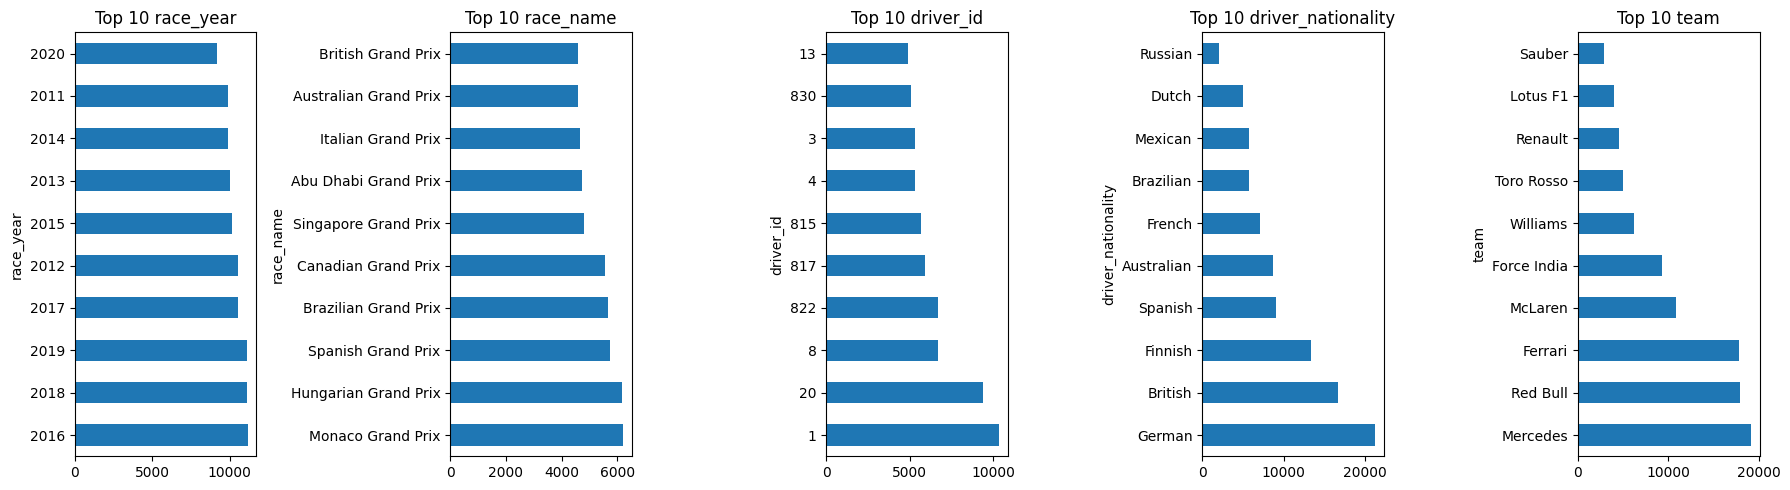

In [37]:
# bar plot for top categories
plt.figure(figsize=(18, 5))

for indx, col in enumerate(['race_year', 'race_name', 'driver_id', 'driver_nationality', 'team']):
    plt.subplot(1, 5, indx+1)
    df[col].value_counts().head(10).plot(kind='barh')
    plt.title(f"Top 10 {col}")

plt.tight_layout()
plt.show()

#### *3. Numerical Features: Statistical Distribution*

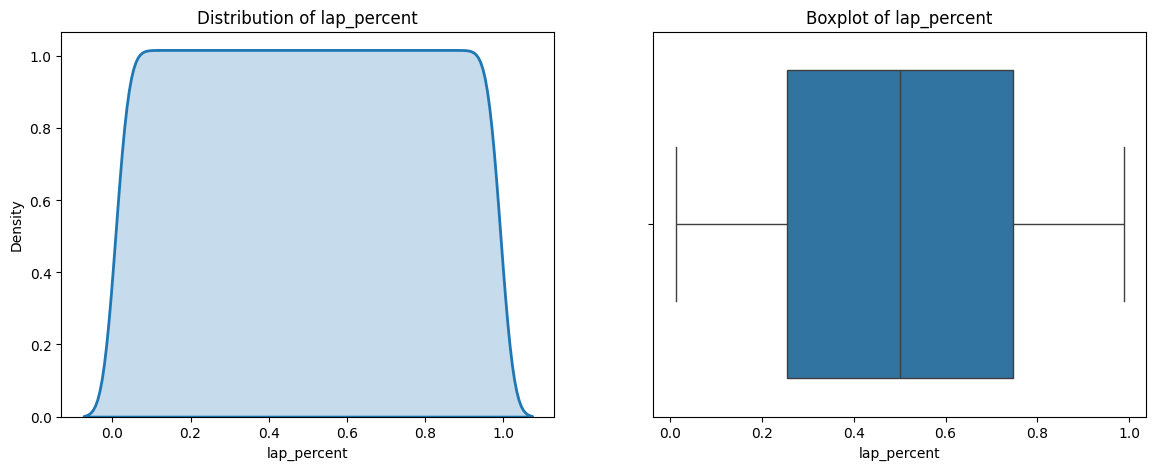

lap_percent: Skewness = 0.000, Kurtosis = -1.201
--------------------------------------------------


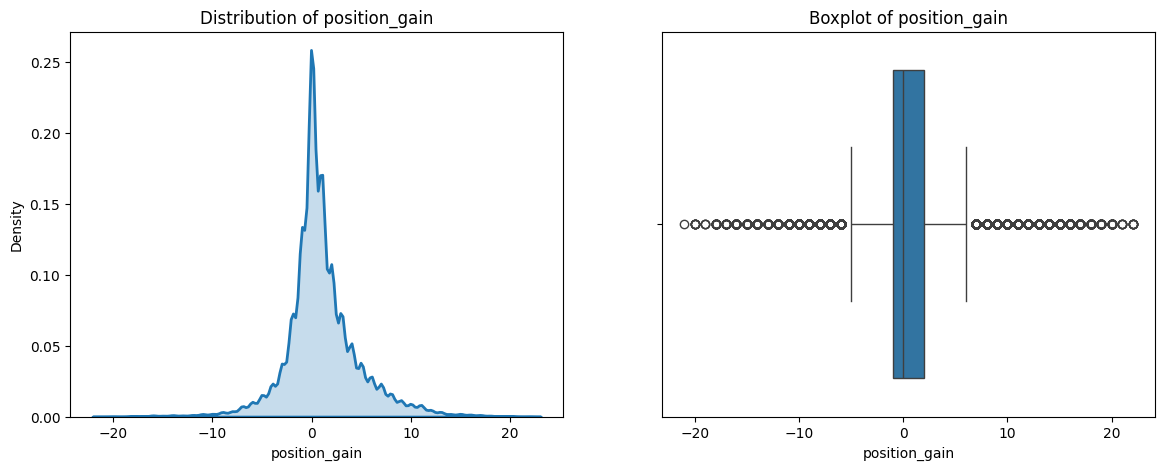

position_gain: Skewness = 0.493, Kurtosis = 3.762
--------------------------------------------------


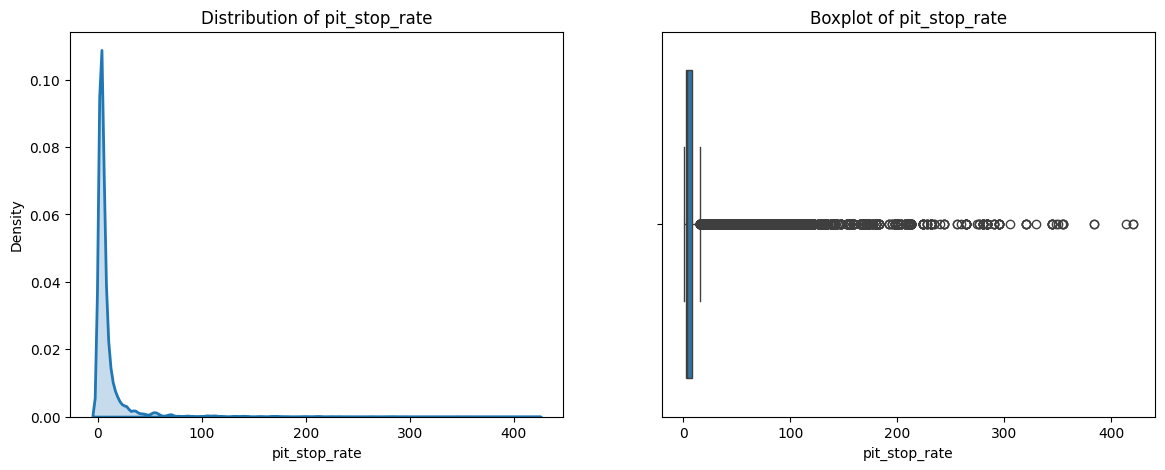

pit_stop_rate: Skewness = 6.858, Kurtosis = 66.218
--------------------------------------------------


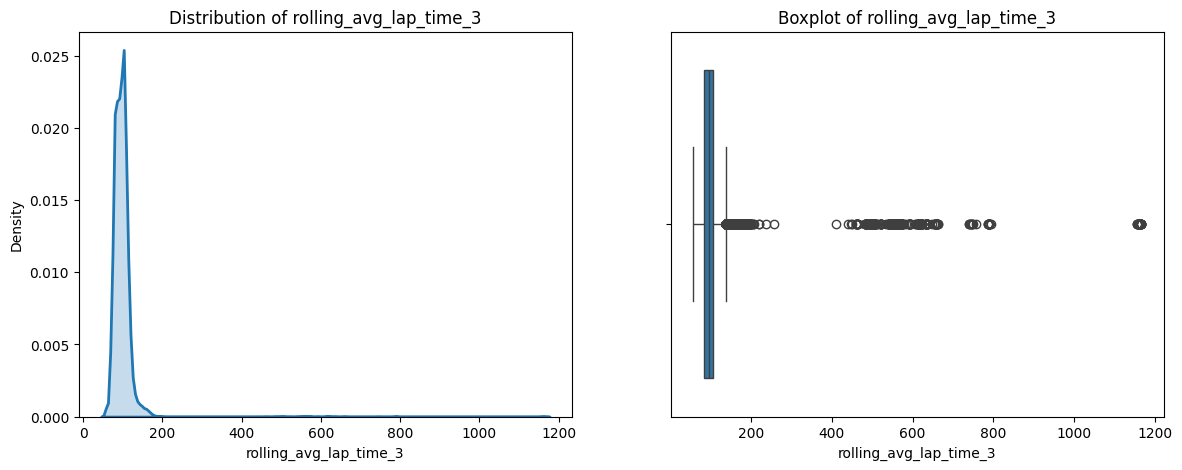

rolling_avg_lap_time_3: Skewness = 14.708, Kurtosis = 305.672
--------------------------------------------------


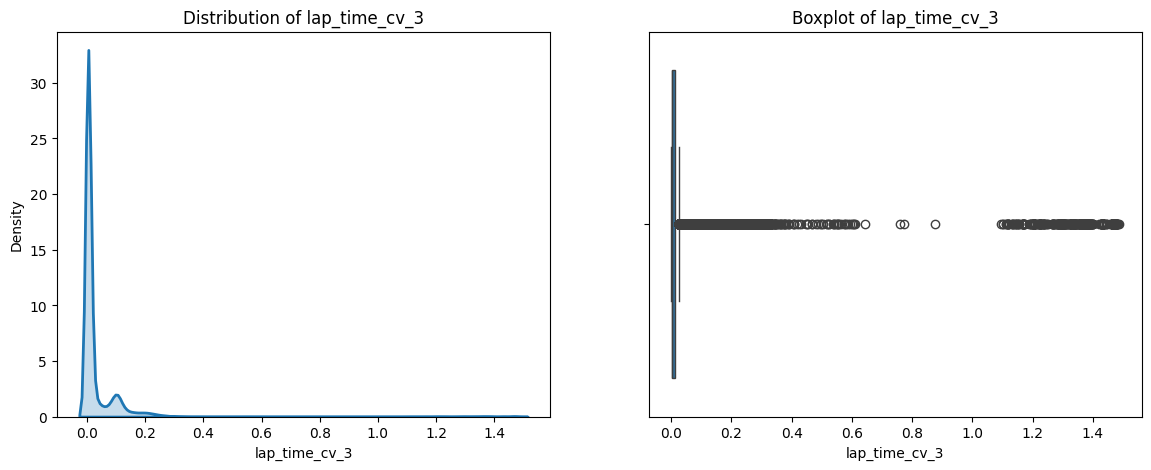

lap_time_cv_3: Skewness = 10.620, Kurtosis = 147.291
--------------------------------------------------


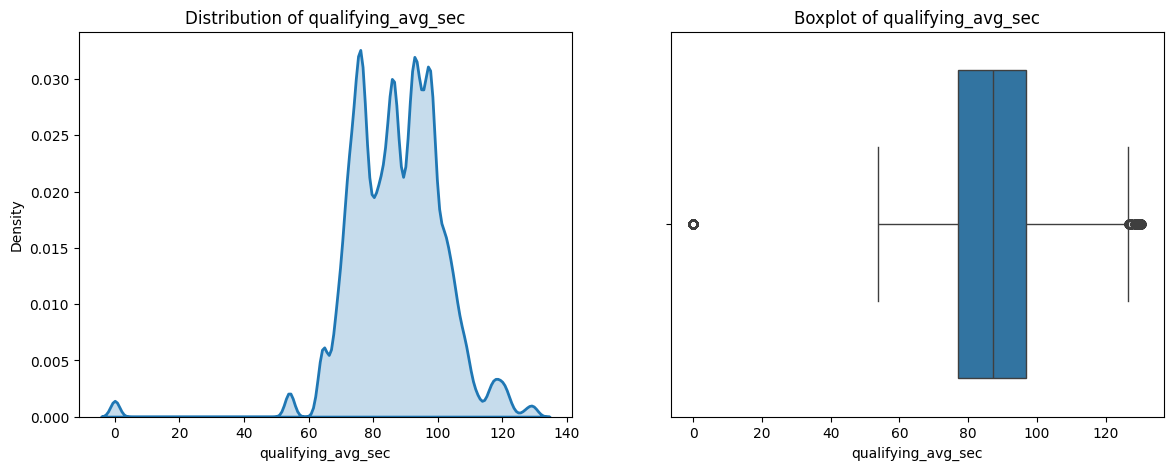

qualifying_avg_sec: Skewness = -0.917, Kurtosis = 6.234
--------------------------------------------------


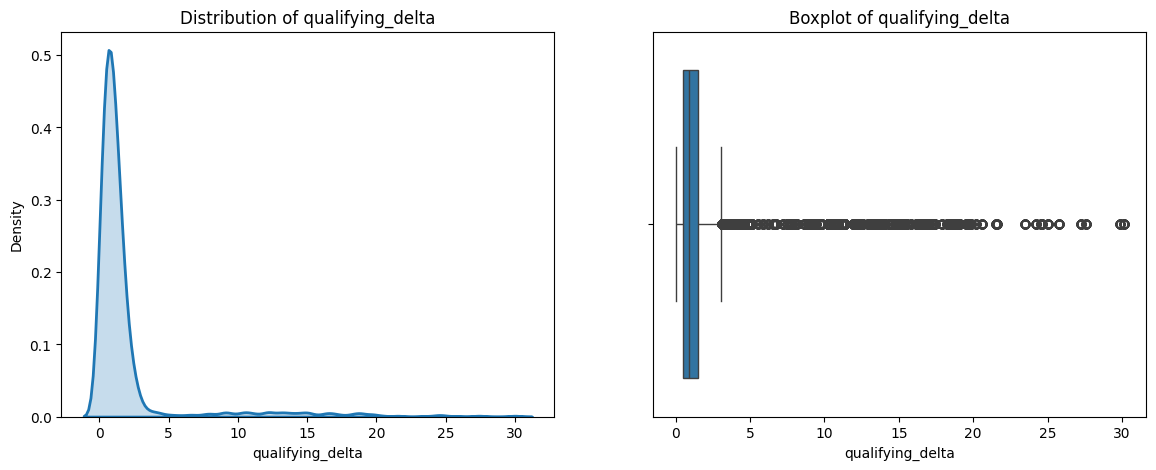

qualifying_delta: Skewness = 4.035, Kurtosis = 17.430
--------------------------------------------------


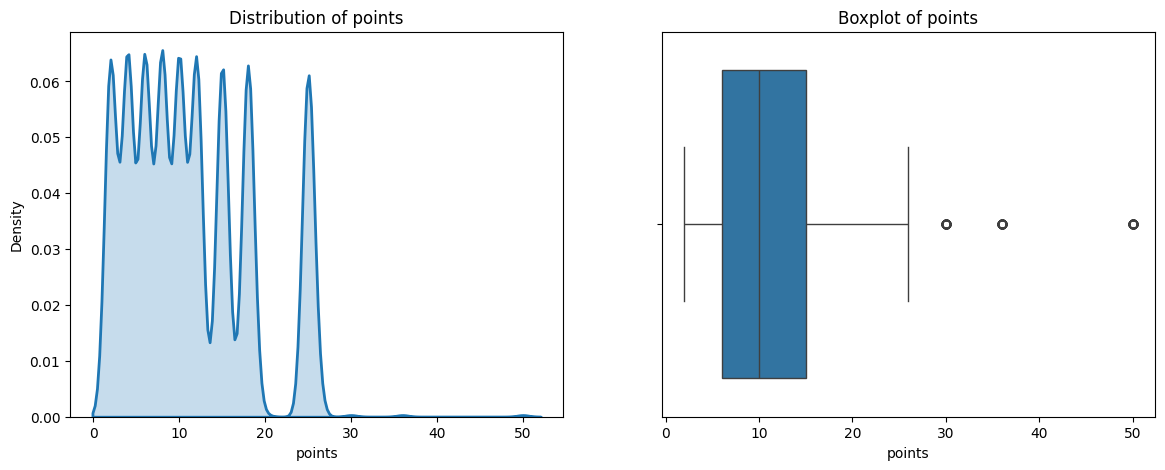

points: Skewness = 0.686, Kurtosis = -0.070
--------------------------------------------------


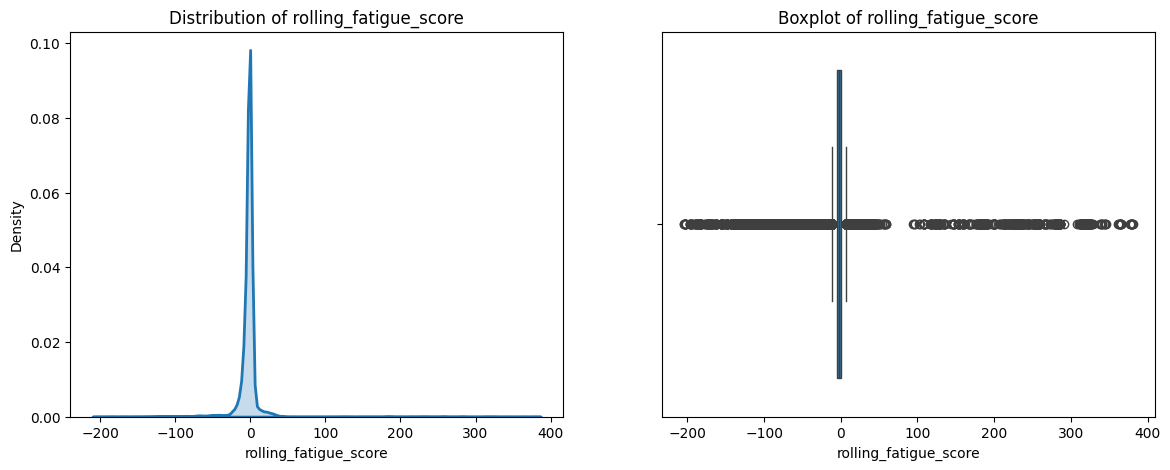

rolling_fatigue_score: Skewness = 5.566, Kurtosis = 98.893
--------------------------------------------------


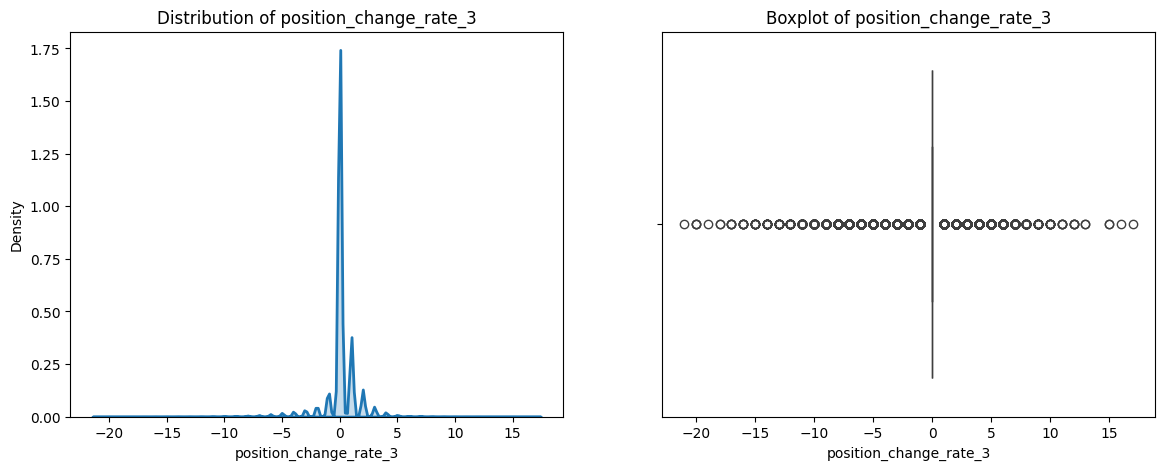

position_change_rate_3: Skewness = -1.985, Kurtosis = 18.711
--------------------------------------------------


In [22]:
# 3.1 Distribution Plots, Boxplots, Skewness, Kurtosis
for col in numerical_cols:
    if (col not in ['race_year', 'driver_id']):
        plt.figure(figsize=(14, 5))

        plt.subplot(1, 2, 1)
        sns.kdeplot(df[col], fill=True, linewidth=2)
        plt.title(f'Distribution of {col}')
        
        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot of {col}')

        plt.show()

        print(f"{col}: Skewness = {df[col].skew():.3f}, Kurtosis = {df[col].kurt():.3f}")
        print("-" * 50)


#### **4. Correlation Matrix (Numerical Features)**

In [24]:
numerical_cols = [
'lap_percent',
'position_gain',
'pit_stop_rate',
'rolling_avg_lap_time_3',
'lap_time_cv_3',
'qualifying_avg_sec',
'qualifying_delta',
'points',
'rolling_fatigue_score',
'position_change_rate_3'
]

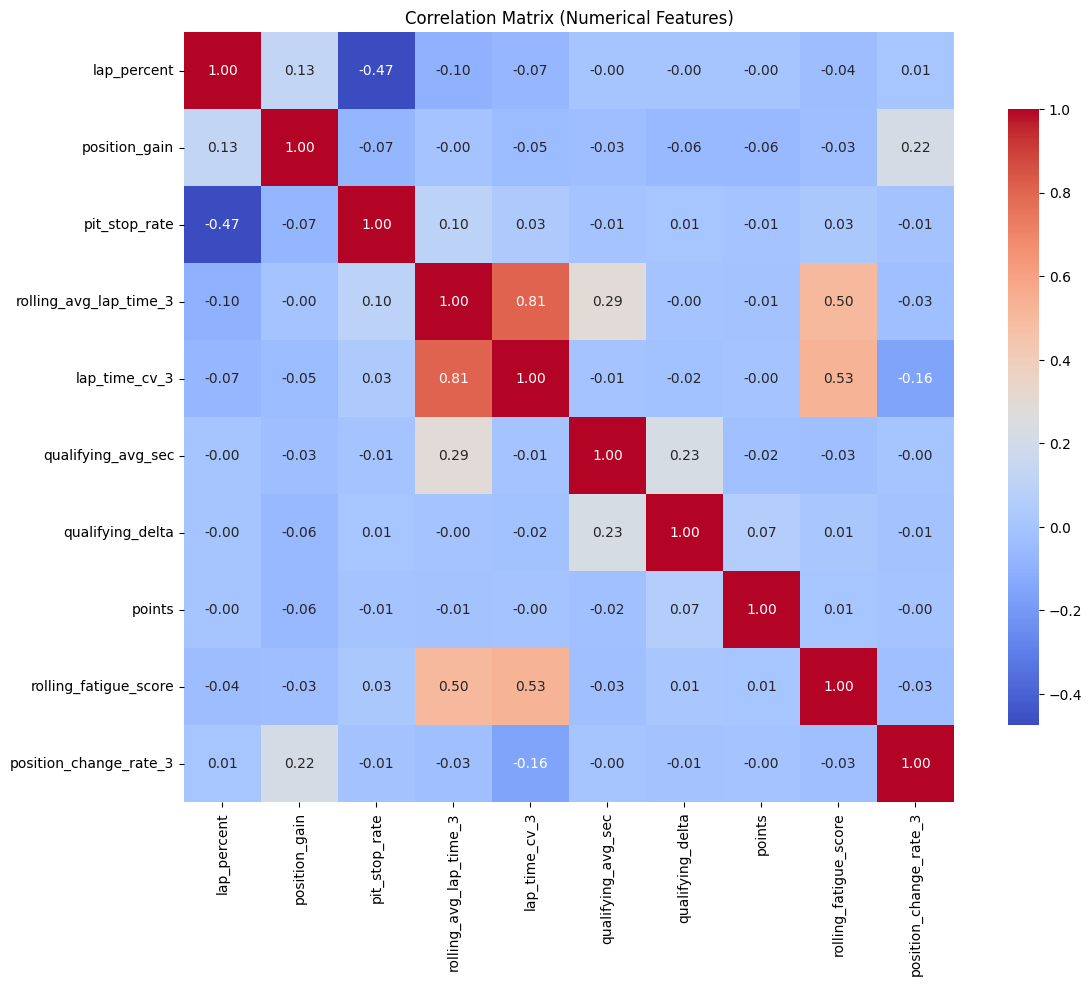

In [25]:
# 4.1 Correlation Heatmap
plt.figure(figsize=(14,10))
corr = df[numerical_cols].corr()

sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Matrix (Numerical Features)")
plt.show()


#### **5. Target Variable (is_pole_position) Analysis**

In [28]:
df['is_pole_position'].value_counts(normalize=True) * 100

is_pole_position
False    66.516501
True     33.483499
Name: proportion, dtype: float64

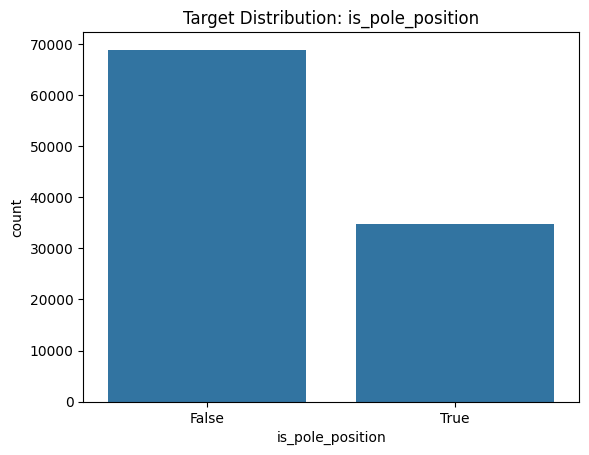

In [29]:
sns.countplot(x='is_pole_position', data=df)
plt.title('Target Distribution: is_pole_position')
plt.show()

#### **6. Feature vs Target Analysis**

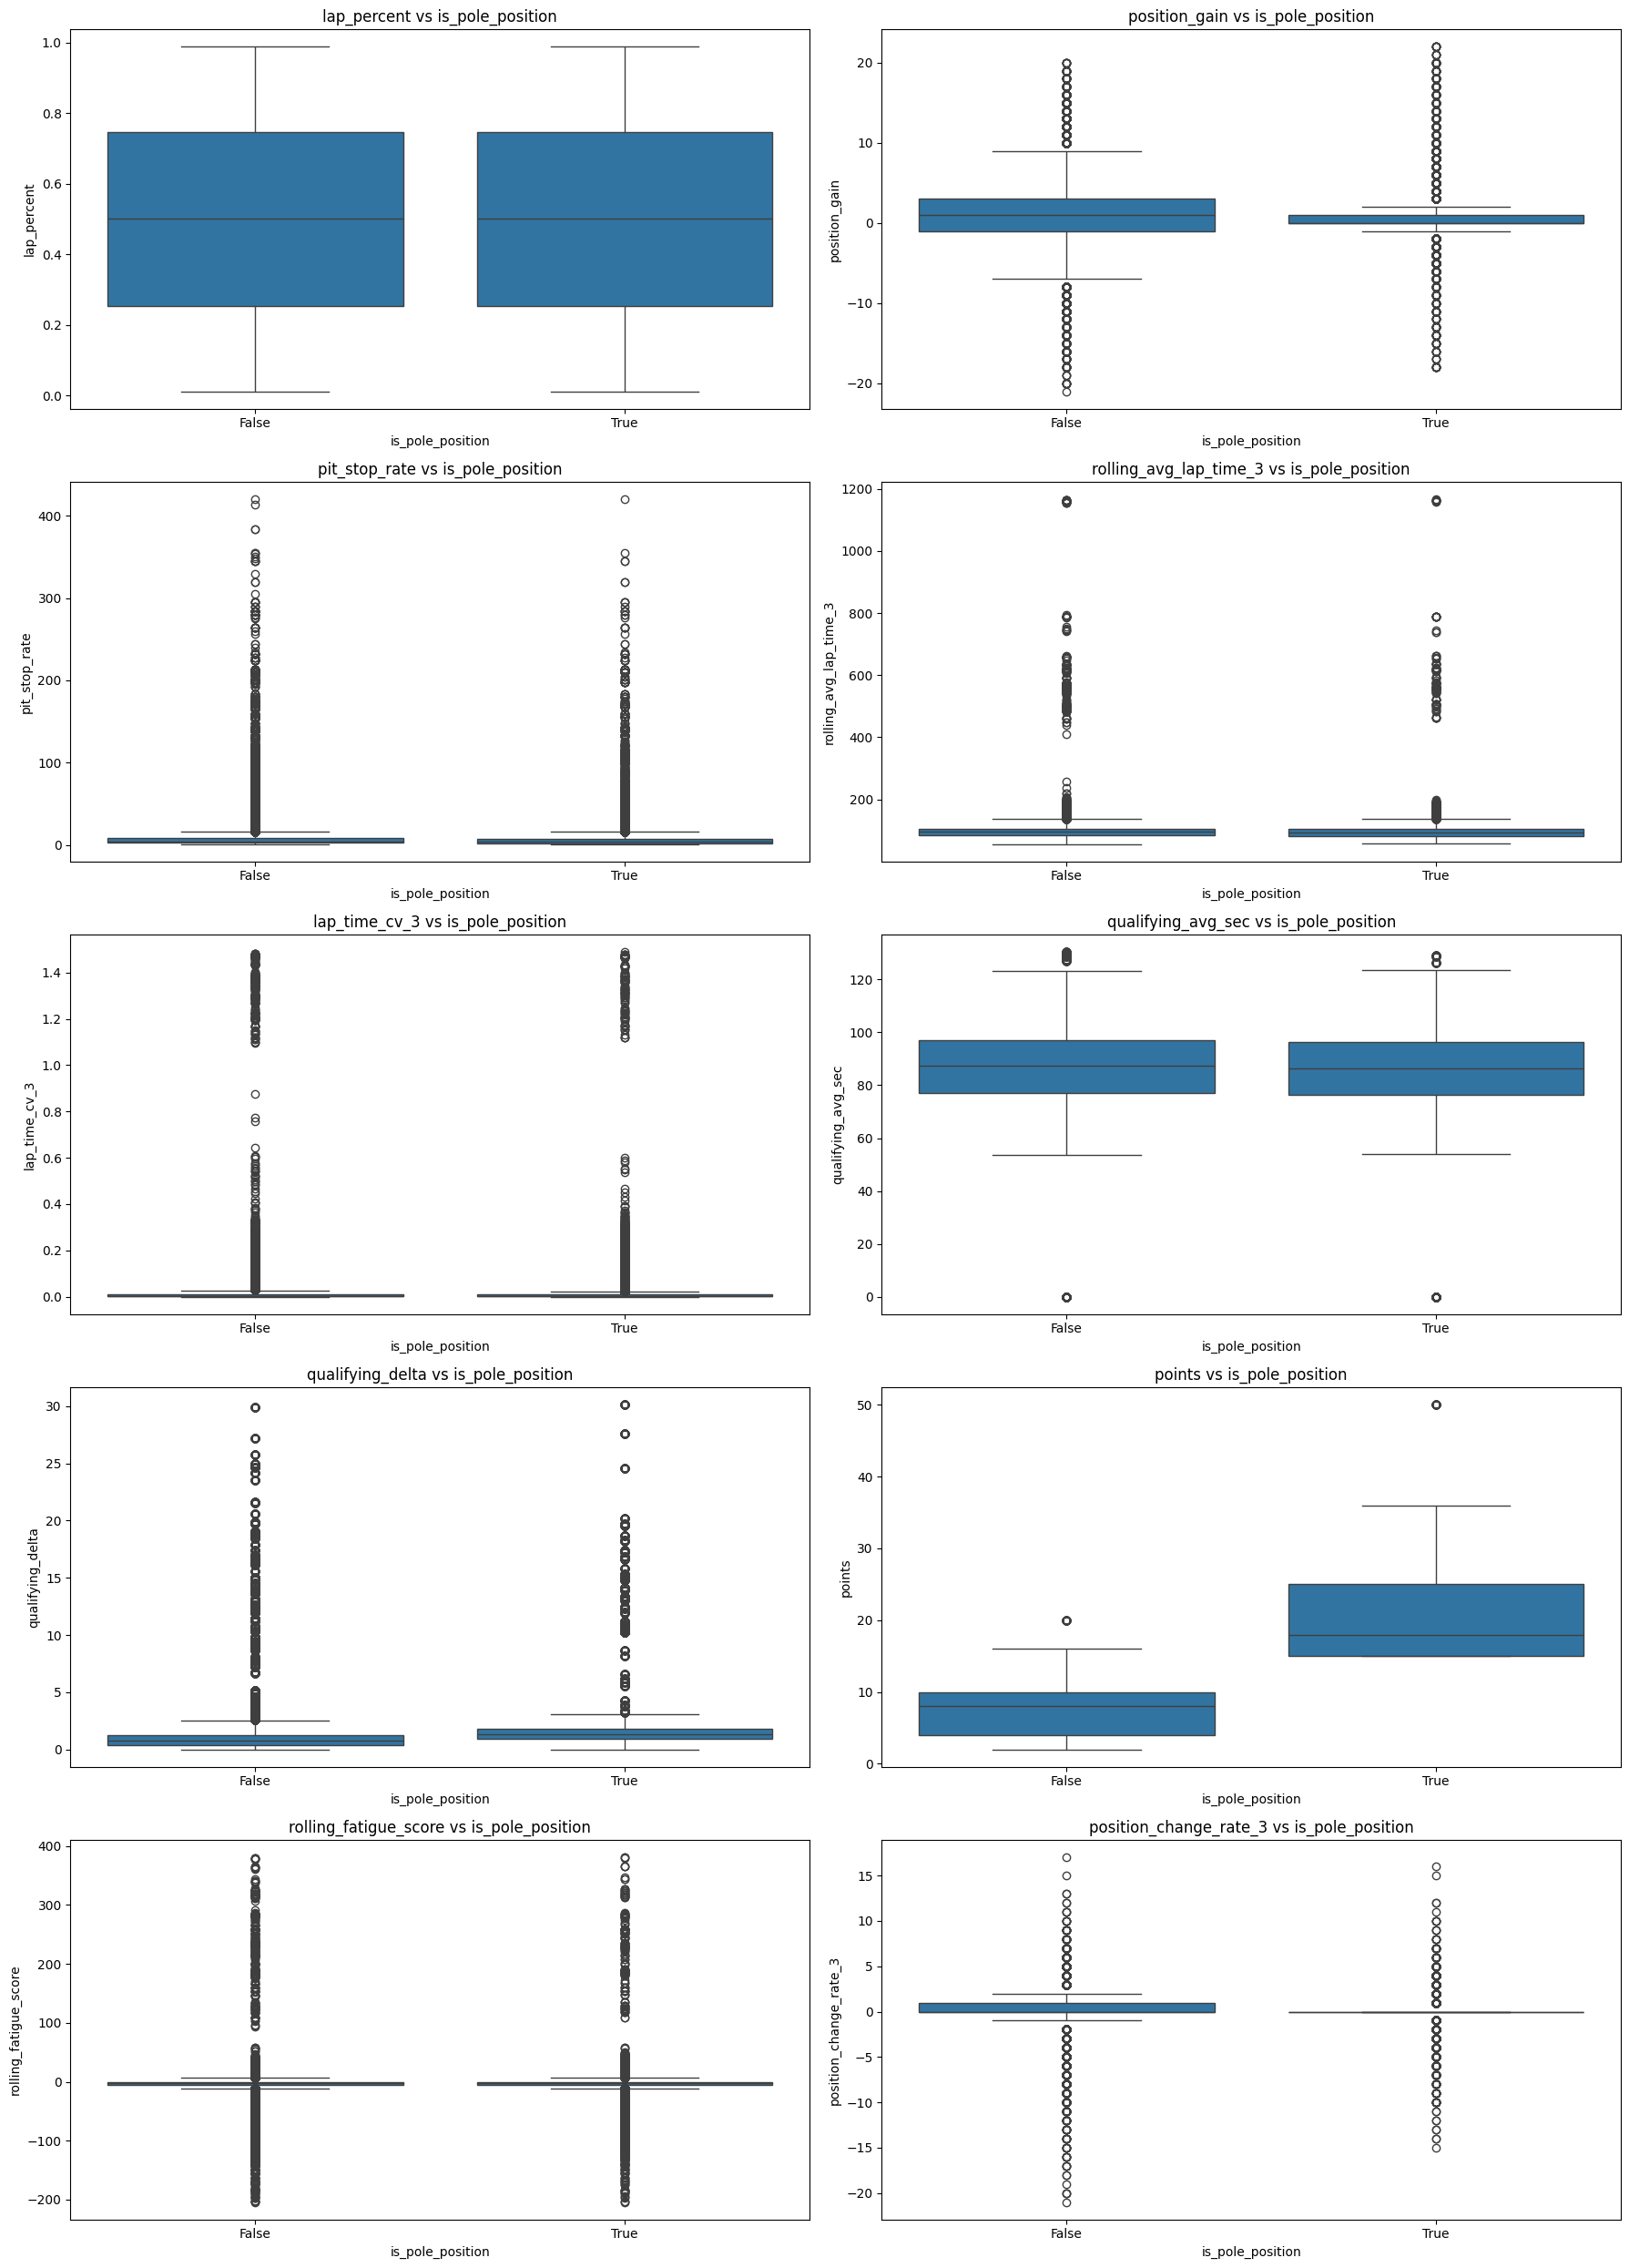

In [31]:
fig, axes = plt.subplots(5, 2, figsize=(18, 25))  # width x height

# Flatten axes to 1D array to make indexing easier
axes = axes.flatten()

# Loop over numerical columns
for idx, col in enumerate(numerical_cols):
    sns.boxplot(x='is_pole_position', y=col, data=df, ax=axes[idx])
    axes[idx].set_title(f'{col} vs is_pole_position', fontsize=12)
    axes[idx].set_xlabel('is_pole_position')
    axes[idx].set_ylabel(col)

# Adjust layout
plt.tight_layout()
plt.show()

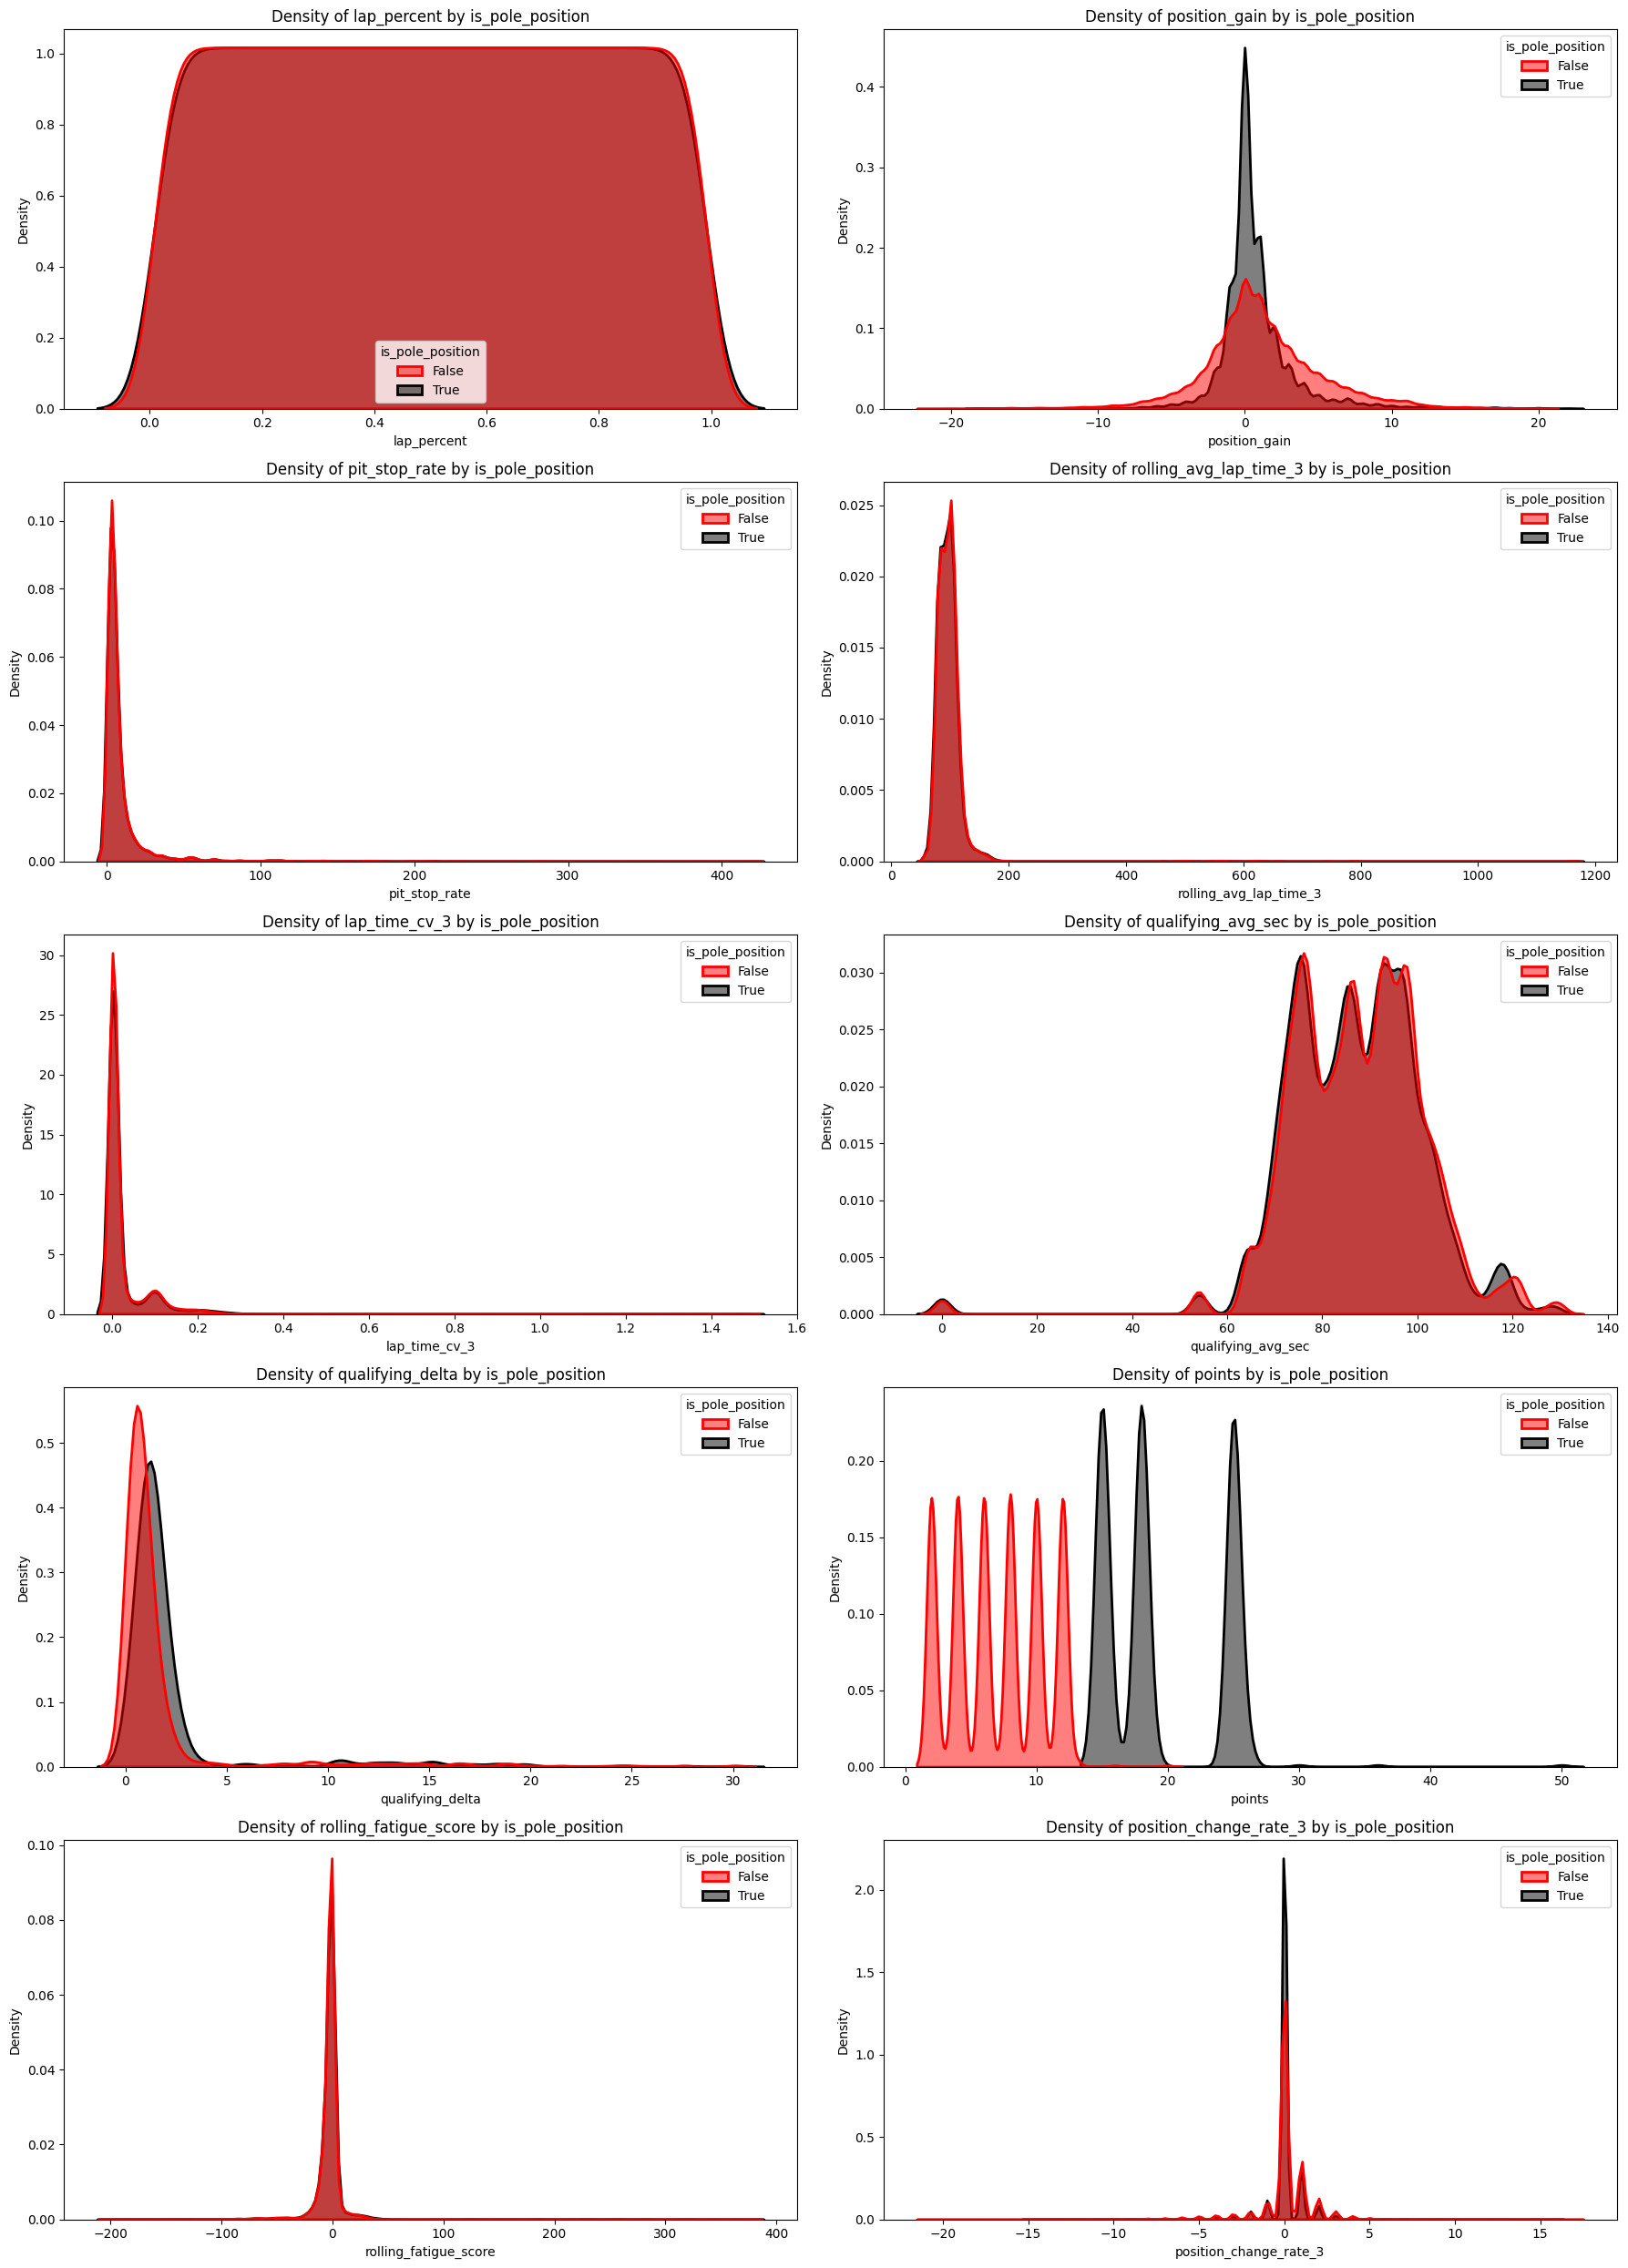

In [35]:
# Define custom palette manually
custom_palette = {True: "black", False: "red"}

# Create subplots: 5 rows, 2 columns
fig, axes = plt.subplots(5, 2, figsize=(18, 25))  # width x height

# Flatten axes to 1D array
axes = axes.flatten()

# Loop over numerical columns
for idx, col in enumerate(numerical_cols):
    sns.kdeplot(
        data=df,
        x=col,
        hue='is_pole_position',
        fill=True,
        common_norm=False,
        palette=custom_palette,
        alpha=0.5,
        linewidth=2,
        ax=axes[idx]
    )
    axes[idx].set_title(f'Density of {col} by is_pole_position', fontsize=12)
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Density')

# Adjust layout
plt.tight_layout()
plt.show()

#### **7. Pairplots**

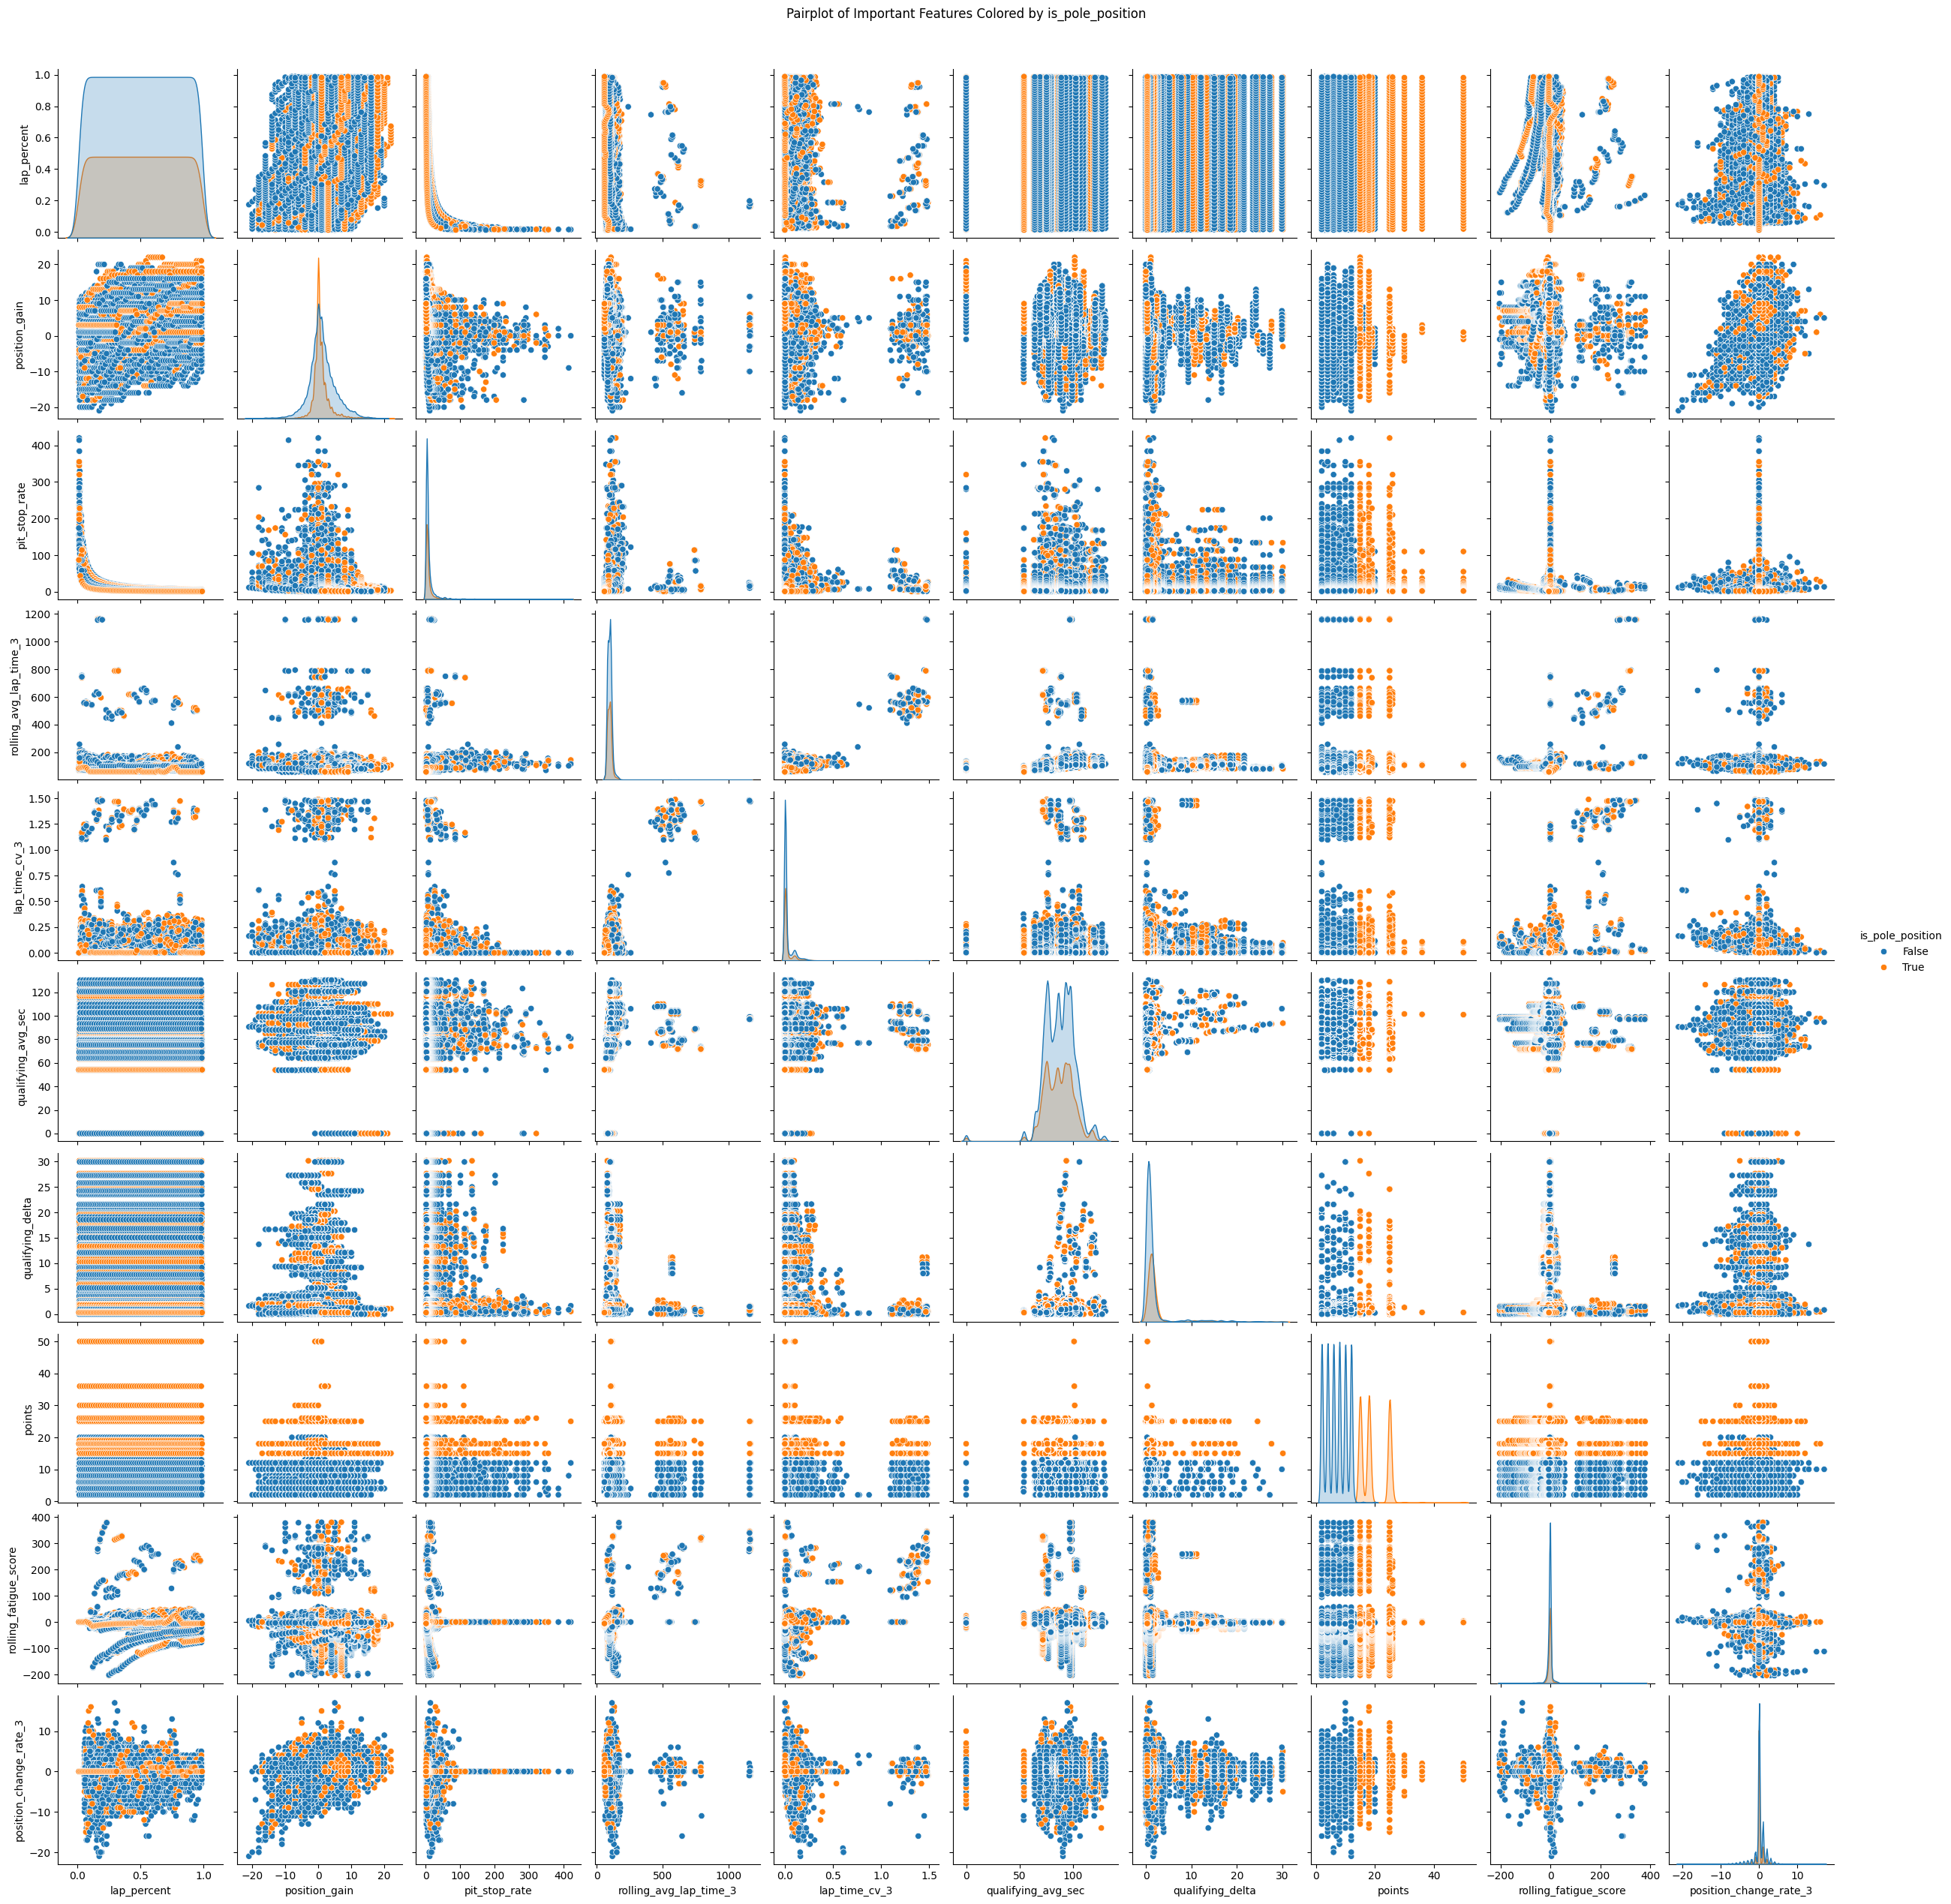

In [33]:
pairplot_cols = numerical_cols + ['is_pole_position']

# Create pairplot
sns.pairplot(df[pairplot_cols], hue='is_pole_position', diag_kind='kde')
plt.suptitle('Pairplot of Important Features Colored by is_pole_position', y=1.02)
plt.show()